# Proyecto Intermedio: Ejercicio 3

### Karla Lilí Velasco Butrón

#### 1.- Implementación de un código para la estimación de Pi por el método de Monte Carlo.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

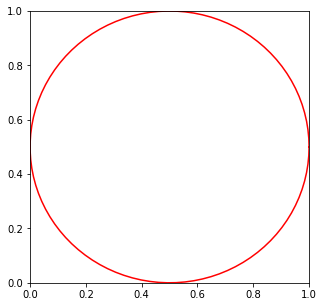

In [23]:
#Primeramente trazamos un círculo de diámetro 1 y radio 0.5 dentro de un cuadrado de lado 1.

plt.figure(figsize = (5,5))

θ = np.linspace(0, 2 * np.pi, 100)
x = 0.5 + 0.5 * np.cos(θ)
y = 0.5 + 0.5 * np.sin(θ)

plt.plot(x, y, color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [51]:
#Implementamos una función que nos dé una serie de puntos aleatorios, en este caso entre 0 y 1 (nuevamente se usa "def" al estar usando el kernel de python).

def Parejas(n):
    c = 0
    x = []
    y = []
    
    while c < n:
        x.append(random.uniform(0,1))
        y.append(random.uniform (0,1))
        c += 1
    
    return list(zip(x,y))

In [52]:
z = Parejas(1)

print(z)
print('')
print('Existe(n) {} puntos en esta lista.'.format(len(z)))

[(0.8989223049559586, 0.45637908214797696)]

Existe(n) 1 puntos en esta lista.


In [53]:
z_x = z[0][0]
z_y = z[0][1]

print(z_x, z_y)

0.8989223049559586 0.45637908214797696


In [54]:
#Definimos nuestro círculo de radio 0.5 y con centro en (0.5, 0.5) 

r = 0.5         
x_1 = 0.5        
y_1 = 0.5        

#Implementamos una función y a su vez, con < excluimos esos puntos de la circuferencia.

def Circulo(x,y):                         
    return ((x - x_1)**2 + (y - y_1)**2) < r**2 

In [55]:
print(Circulo(1, 1))

False


In [56]:
Circulo(z_x, z_y)

True

In [62]:
#Usando la ecuación dada en el problema y las funciones anteriores, se puede implementar otra función en la cual podemos generar múltiples aproximaciones diferentes para pi.

def Conteo(n):
    z = Parejas(n)
    Conteo = 0
    
    for i in z:
        x = i[0]
        y = i[1]
        Conteo += Circulo(x, y)
        
    return 'Se encontraron {} puntos de {} intentos aleatorios con una precisión de {}, que es una aproximación pi de {}'.format(Conteo, n, Conteo/n, 4*Conteo/n)

Jugamos con el número de puntos:

In [63]:
n = 10
i_10 = Conteo(n)
print(i_10)

Se encontraron 8 puntos de 10 intentos aleatorios con una precisión de 0.8, que es una aproximación pi de 3.2


In [64]:
n = 100
i_100 = Conteo(n)
print(i_100)

Se encontraron 81 puntos de 100 intentos aleatorios con una precisión de 0.81, que es una aproximación pi de 3.24


In [65]:
n = 1000
i_1000 = Conteo(n)
print(i_1000)

Se encontraron 773 puntos de 1000 intentos aleatorios con una precisión de 0.773, que es una aproximación pi de 3.092


In [66]:
n = 10000
i_10000 = Conteo(n)
print(i_10000)

Se encontraron 7881 puntos de 10000 intentos aleatorios con una precisión de 0.7881, que es una aproximación pi de 3.1524


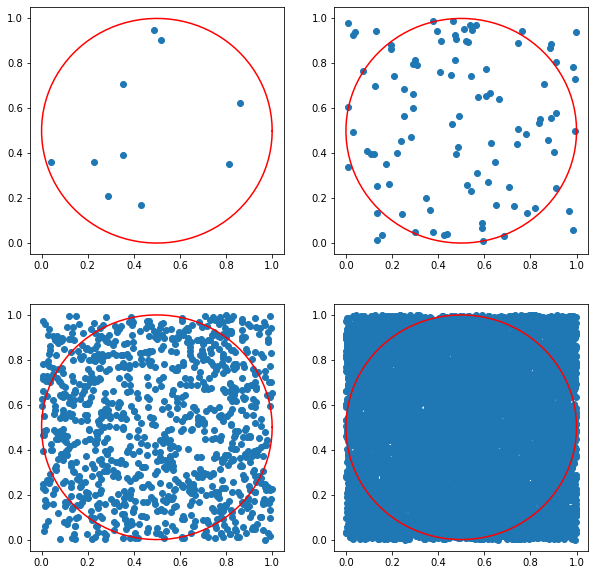

In [101]:
#Al encontrar un valor cercano a pi, procedemos a implementar una nueva función que nos permita ver gráficamente esto.

plt.figure(figsize = (10,10))

θ = np.linspace(0, 2 * np.pi, 100)
x = 0.5 + 0.5 * np.cos(θ)
y = 0.5 + 0.5 * np.sin(θ)

l =[10, 100, 1000, 10000]

for i in l:
    x1, y1 = [], []
    z = Parejas(i)
    for j in range (0, len(z)):
        x1.append(z[j][0])
        y1.append(z[j][1])
        
    plt.subplot(2, 2, (l.index(i) + 1))
    plt.plot(x, y, color = 'red')
    plt.scatter(x1, y1)
    plt.plot()

#### 2.- Realización de la gráfica de error.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#Implementamos una función que nos permita obtener una aproximación del valor de pi a partir del número de puntos.

def GraficaPi(NoPuntos = 100):
    
    x = np.random.uniform(0, 1, NoPuntos)
    y = np.random.uniform(0, 1, NoPuntos)
    ConteoPuntos = 0
    
    for i in range(NoPuntos):
        
        if x[i]**2 + y[i]**2 <= 1:
            ConteoPuntos += 1
        
    pi_value = 4 * ConteoPuntos / NoPuntos
    
    return pi_value

In [74]:
GraficaPi(NoPuntos=10000)

3.1428

In [75]:
nr_puntos = []
mc_pi = []

for npuntos in range(1, 1000):
    NoPuntos = 100 * npuntos
    nr_puntos.append(NoPuntos)
    pi = GraficaPi(NoPuntos = NoPuntos)
    mc_pi.append(pi)

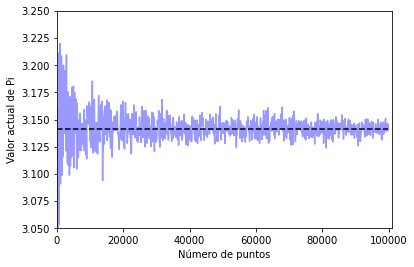

In [82]:
#Separamos la celdas para que nuestro código no tarde mucho tiempo en correr.

plt.plot(nr_puntos, mc_pi, 'b-', alpha = 0.4)
plt.plot([nr_puntos[0], nr_puntos[-1]], [np.pi, np.pi], 'k--')
xmin, xmax, ymin, ymax = 0, 1.01 * np.amax(nr_puntos), 3.05, 3.25
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel('Número de puntos')
plt.ylabel('Valor actual de Pi');

∴ Se puede decir que necesitamos en promedio 10000 puntos para obtener un valor cercano a pi. 